In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import os
from google.colab import files
uploaded = files.upload()
uploaded_filename = list(uploaded.keys())[0]
extract_dir = "extracted_data"
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(uploaded_filename, 'r') as zip_ref:
      zip_ref.extractall(extract_dir)
extracted_files = os.listdir(extract_dir)
csv_file = [f for f in extracted_files if f.endswith('.csv')][0]
csv_filepath = os.path.join(extract_dir, csv_file)
df = pd.read_csv(csv_filepath)
df

Saving IMDB Dataset.csv.zip to IMDB Dataset.csv (1).zip


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df["review"]=df["review"].str.lower()
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
df['tokens'] = df['review'].apply(lambda x: word_tokenize(x.lower()))
df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])
print(df[['review', 'filtered_tokens']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                              review  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production. <br /><br />the...   
2  i thought this was a wonderful way to spend ti...   
3  basically there's a family where a little boy ...   
4  petter mattei's "love in the time of money" is...   

                                     filtered_tokens  
0  [one, reviewers, mentioned, watching, oz, epis...  
1  [wonderful, little, production, br, br, filmin...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, family, little, boy, jake, thinks,...  
4  [petter, mattei, love, time, money, visually, ...  


In [ ]:
    pip install wordcloud matplotlib numpy Pillow

                 Word  Frequency
10                 br     201951
273             movie      85070
283              film      76919
0                 one      51828
291              like      39183
...               ...        ...
70847  übermenschlich          1
39365      mindgaming          1
39361          eislin          1
70850         tabanga          1
96882         clatter          1

[96883 rows x 2 columns]
Top 10 frequent words: ['br', 'movie', 'film', 'one', 'like', 'good', 'would', 'even', 'time', 'really']


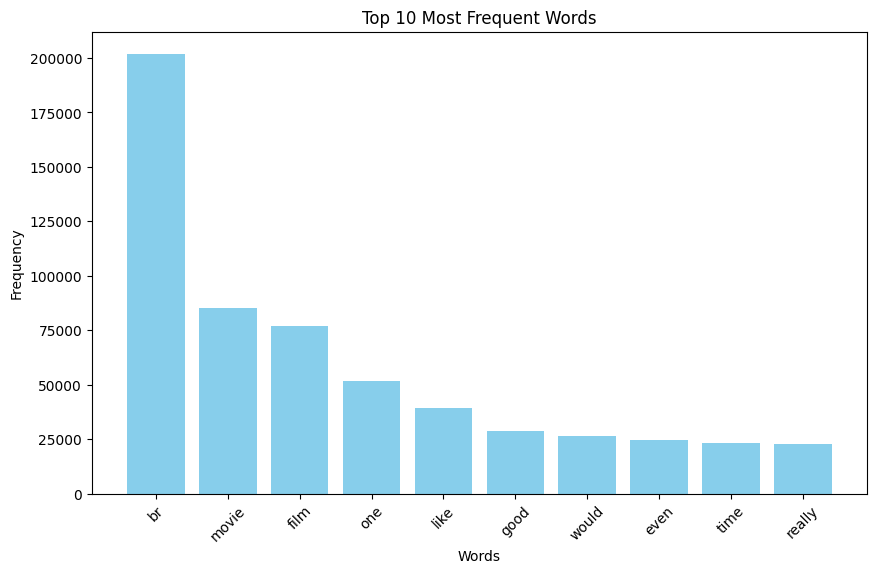

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word2count = {}

for data in df['filtered_tokens']:
    for word in data:
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

stop_words = set(stopwords.words('english'))

filtered_word2count = {word: count for word, count in word2count.items() if word not in stop_words}

word_freq_df = pd.DataFrame(list(filtered_word2count.items()), columns=['Word', 'Frequency'])

word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

print(word_freq_df)
import heapq
import matplotlib.pyplot as plt

freq_words = heapq.nlargest(10, word2count, key=word2count.get)

print(f"Top 10 frequent words: {freq_words}")

top_words = sorted(word2count.items(), key=lambda x: x[1], reverse=True)[:10]
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

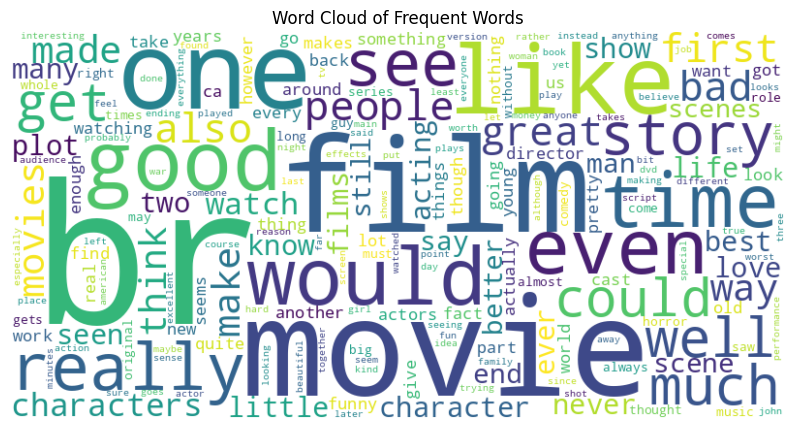

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word2count = {}

for data in df['filtered_tokens']:
    for word in data:
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word2count)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Frequent Words")
plt.show()

In [18]:
!pip install SentimentIntensityAnalyzer

ERROR: Could not find a version that satisfies the requirement SentimentIntensityAnalyzer (from versions: none)
ERROR: No matching distribution found for SentimentIntensityAnalyzer


In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def label_from_vader(text):
    score = sia.polarity_scores(str(text))["compound"]
    if score <= -0.6:
        return 0  # Very Negative
    elif score <= -0.2:
        return 1  # Negative
    elif score < 0.2:
        return 2  # Neutral
    elif score < 0.6:
        return 3  # Positive
    else:
        return 4  # Very Positive

In [21]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [24]:
df["label"] = df["review"].apply(label_from_vader)
df

,review,sentiment,tokens,filtered_tokens,label
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis...",0
1,a wonderful little production. <br /><br />the...,positive,"[a, wonderful, little, production, ., <, br, /...","[wonderful, little, production, br, br, filmin...",4
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...",4
3,basically there's a family where a little boy ...,negative,"[basically, there, 's, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,...",0
4,"petter mattei's ""love in the time of money"" is...",positive,"[petter, mattei, 's, ``, love, in, the, time, ...","[petter, mattei, love, time, money, visually, ...",4
...,...,...,...,...,...
49995,i thought this movie did a down right good job...,positive,"[i, thought, this, movie, did, a, down, right,...","[thought, movie, right, good, job, creative, o...",4
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative,"[bad, plot, ,, bad, dialogue, ,, bad, acting, ...","[bad, plot, bad, dialogue, bad, acting, idioti...",0
49997,i am a catholic taught in parochial elementary...,negative,"[i, am, a, catholic, taught, in, parochial, el...","[catholic, taught, parochial, elementary, scho...",0
49998,i'm going to have to disagree with the previou...,negative,"[i, 'm, going, to, have, to, disagree, with, t...","[going, disagree, previous, comment, side, mal...",0


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['label'])

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, stop_words="english")),
    ("clf", LogisticRegression(multi_class="multinomial", solver="saga", max_iter=2000))])

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import pickle

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
with open("imdb_multiclass_sentiment.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("✅ Model saved as imdb_multiclass_sentiment.pkl")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0      0.895     0.884     0.889      5012
           1      0.885     0.896     0.890      4988

    accuracy                          0.890     10000
   macro avg      0.890     0.890     0.890     10000
weighted avg      0.890     0.890     0.890     10000

Confusion Matrix:
 [[4430  582]
 [ 521 4467]]
✅ Model saved as imdb_multiclass_sentiment.pkl


In [47]:
def get_emotion(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.3:
        return 'joy'
    elif polarity < -0.3:
        return 'anger'
    else:
        return 'neutral'

In [48]:
def detect_sarcasm(text):
    sarcasm_keywords = ['not what I expected', 'totally', 'just great', 'amazing...']
    for kw in sarcasm_keywords:
        if kw.lower() in text.lower():
            return 'sarcastic'
    return 'not_sarcastic'

In [50]:
from textblob import TextBlob

aspects = ['acting', 'storyline', 'music', 'cinematography', 'direction']

def extract_aspect_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    aspect_dict = {}
    for aspect in aspects:
        if aspect in text.lower():
            if sentiment > 0:
                aspect_dict[aspect] = 'positive'
            elif sentiment < 0:
                aspect_dict[aspect] = 'negative'
            else:
                aspect_dict[aspect] = 'neutral'
    return aspect_dict

# Apply fast functions
df['emotion'] = df['review'].apply(get_emotion)
df['sarcasm'] = df['review'].apply(detect_sarcasm)
df['aspect_sentiment'] = df['review'].apply(extract_aspect_sentiment)

print(df)

                                                  review sentiment  \
0      one of the other reviewers has mentioned that ...  positive   
1      a wonderful little production. <br /><br />the...  positive   
2      i thought this was a wonderful way to spend ti...  positive   
3      basically there's a family where a little boy ...  negative   
4      petter mattei's "love in the time of money" is...  positive   
...                                                  ...       ...   
49995  i thought this movie did a down right good job...  positive   
49996  bad plot, bad dialogue, bad acting, idiotic di...  negative   
49997  i am a catholic taught in parochial elementary...  negative   
49998  i'm going to have to disagree with the previou...  negative   
49999  no one expects the star trek movies to be high...  negative   

                                                  tokens  \
0      [one, of, the, other, reviewers, has, mentione...   
1      [a, wonderful, little, productio

/tmp/ipython-input-2725252293.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='emotion', palette='Set2')


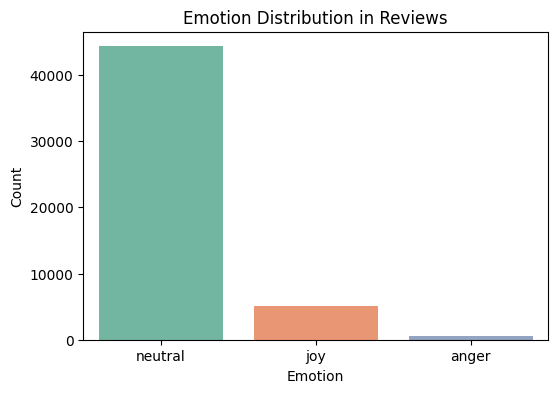

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='emotion', palette='Set2')
plt.title('Emotion Distribution in Reviews')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-987784432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sarcasm', palette='Set1')


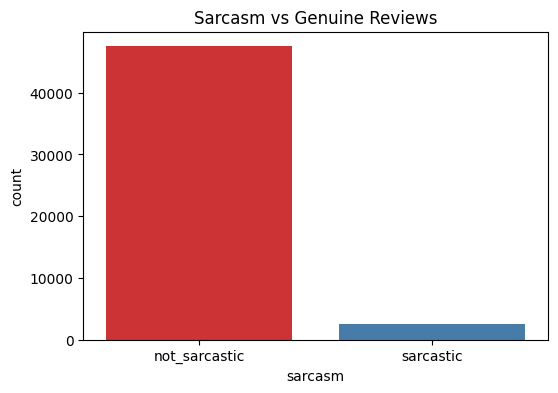

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sarcasm', palette='Set1')
plt.title('Sarcasm vs Genuine Reviews')
plt.show()


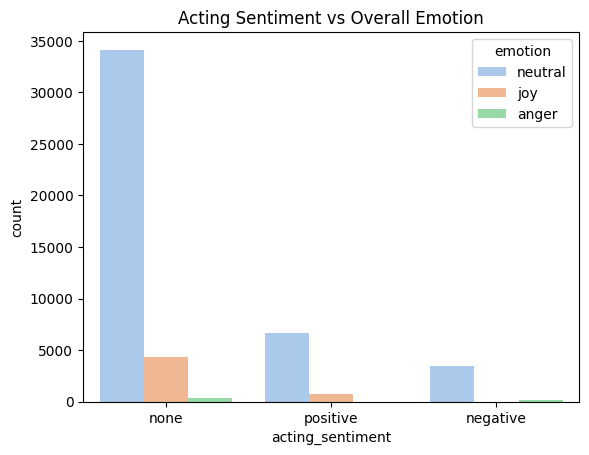

In [53]:
df['acting_sentiment'] = df['aspect_sentiment'].apply(lambda x: x.get('acting', 'none'))
sns.countplot(data=df, x='acting_sentiment', hue='emotion', palette='pastel')
plt.title('Acting Sentiment vs Overall Emotion')
plt.show()


In [56]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 5.5 MB/s eta 0:00:00


In [57]:
import emoji
from collections import Counter
import matplotlib.pyplot as plt

def extract_emojis(text):
    return [c for c in text if c in emoji.EMOJI_DATA]

# Extract emojis from all reviews
df['emojis'] = df['review'].apply(extract_emojis)

# Flatten list of all emojis
all_emojis = [e for sublist in df['emojis'] for e in sublist]

# Count frequency
emoji_counts = Counter(all_emojis)
print("Most frequent emojis:\n", emoji_counts.most_common(10))


Most frequent emojis:
 [('®', 4), ('©', 1)]


In [59]:
emoji_emotion_map = {
    '😍':'joy', '😂':'joy', '😭':'sadness', '😡':'anger', '😱':'fear', '🤯':'surprise'
}

df['emoji_emotion'] = df['emojis'].apply(lambda x: [emoji_emotion_map.get(e) for e in x if e in emoji_emotion_map])


In [60]:
df

,review,sentiment,tokens,filtered_tokens,label,emotion,sarcasm,aspect_sentiment,acting_sentiment,timestamp,emojis,emoji_emotion
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis...",0,neutral,not_sarcastic,{},none,2025-09-21,[],[]
1,a wonderful little production. <br /><br />the...,positive,"[a, wonderful, little, production, ., <, br, /...","[wonderful, little, production, br, br, filmin...",4,neutral,not_sarcastic,{},none,2025-09-21,[],[]
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...",4,joy,not_sarcastic,{},none,2025-09-21,[],[]
3,basically there's a family where a little boy ...,negative,"[basically, there, 's, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,...",0,neutral,sarcastic,{},none,2025-09-21,[],[]
4,"petter mattei's ""love in the time of money"" is...",positive,"[petter, mattei, 's, ``, love, in, the, time, ...","[petter, mattei, love, time, money, visually, ...",4,neutral,not_sarcastic,"{'acting': 'positive', 'direction': 'positive'}",positive,2025-09-21,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i thought this movie did a down right good job...,positive,"[i, thought, this, movie, did, a, down, right,...","[thought, movie, right, good, job, creative, o...",4,joy,not_sarcastic,{},none,2025-09-21,[],[]
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative,"[bad, plot, ,, bad, dialogue, ,, bad, acting, ...","[bad, plot, bad, dialogue, bad, acting, idioti...",0,neutral,not_sarcastic,{'acting': 'negative'},negative,2025-09-21,[],[]
49997,i am a catholic taught in parochial elementary...,negative,"[i, am, a, catholic, taught, in, parochial, el...","[catholic, taught, parochial, elementary, scho...",0,neutral,not_sarcastic,{'acting': 'positive'},positive,2025-09-21,[],[]
49998,i'm going to have to disagree with the previou...,negative,"[i, 'm, going, to, have, to, disagree, with, t...","[going, disagree, previous, comment, side, mal...",0,neutral,not_sarcastic,{'direction': 'negative'},none,2025-09-21,[],[]
